In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,SVR

In [2]:
df=pd.read_csv('survey_results_public.csv').drop_duplicates()

In [3]:
columns_list = df.columns.tolist()
print(columns_list)

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [4]:
df.index=df.ResponseId
extra=['MainBranch','ResponseId','Check','SurveyLength', 'SurveyEase','LearnCodeOnline','CodingActivities', 'LanguageAdmired', 'DatabaseWantToWorkWith', 'DatabaseAdmired',
'PlatformWantToWorkWith', 'PlatformAdmired','WebframeWantToWorkWith', 'WebframeAdmired','EmbeddedWantToWorkWith', 'EmbeddedAdmired','NEWSOSites', 'SOVisitFreq', 
'MiscTechWantToWorkWith', 'MiscTechAdmired','ToolsTechWantToWorkWith', 'ToolsTechAdmired','NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired','EmbeddedHaveWorkedWith',
'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired','SOHow','NEWCollabToolsHaveWorkedWith',
'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired','AISearchDevWantToWorkWith', 'AISearchDevAdmired','BuyNewTool','MiscTechHaveWorkedWith',
'SOAccount', 'SOPartFreq','SOComm','AIAcc','AIToolCurrently Using','TBranch', 'ICorPM', 'WorkExp','Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'AIBen',
'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9','Frequency_1', 'Frequency_2', 'Frequency_3','Currency','TechDoc',
'Frustration', 'ProfessionalTech', 'ProfessionalCloud','JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6','LanguageWantToWorkWith',
'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'AIToolNot interested in Using', 'AINextMuch more integrated',
 'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 'AIThreat', 'AIEthics', 'AIChallenges','LearnCode','AISearchDevHaveWorkedWith','AIToolInterested in Using']
df.drop(extra,inplace=True,axis=1)

In [5]:
#categorical(ordinal)>>>numerical
#not sorted
from sklearn.preprocessing import OrdinalEncoder
age_dict={'Prefer not to say':0,'Under 18 years old':1,'18-24 years old':2,'25-34 years old':3,
          '35-44 years old':4,'45-54 years old':5,'55-64 years old':6,'65 years or older':7}
reverse_age_dict={v:k for k,v in age_dict.items()}
df.Age=df.Age.map(age_dict)

edu_dict={'Something else':0,'Primary/elementary school':1,'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':2,
          'Some college/university study without earning a degree':3,
          'Associate degree (A.A., A.S., etc.)':4,'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':5,
          'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':6,'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':7}
reverse_edu_dict={v:k for k,v in edu_dict.items()}
df.EdLevel=df.EdLevel.map(edu_dict)
df.EdLevel = df.EdLevel.fillna(0).astype(int)

df['TimeSearching'] = df['TimeSearching'].fillna('Unknown')
df['TimeAnswering'] = df['TimeAnswering'].fillna('Unknown')
time_enc = OrdinalEncoder(categories=[[
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day',
    'Unknown',
]])
df.TimeSearching=time_enc.fit_transform(df[['TimeSearching']])
df.TimeAnswering=time_enc.fit_transform(df[['TimeAnswering']])

df['PurchaseInfluence'] = df['PurchaseInfluence'].fillna('Unknown')
influence_enc = OrdinalEncoder(categories=[[
    'Unknown',
    'I have little or no influence',
    'I have some influence',
    'I have a great deal of influence',
]])
df.PurchaseInfluence=influence_enc.fit_transform(df[['PurchaseInfluence']])

In [6]:
df['OrgSize'] = df['OrgSize'].fillna('Unknown')
orgSize_enc = OrdinalEncoder(categories=[[
    'Unknown',
    'Just me - I am a freelancer, sole proprietor, etc.',
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
]],handle_unknown='use_encoded_value',  # Handle unknown categories
    unknown_value=-1)
df.OrgSize=orgSize_enc.fit_transform(df[['OrgSize']])

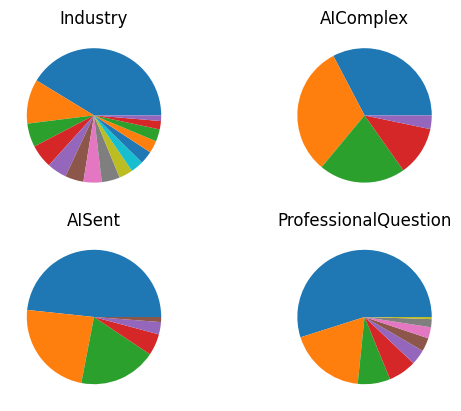

In [7]:
frequency_nominal=['Industry','AIComplex',
                   'AISent','ProfessionalQuestion']
for i,col in enumerate(frequency_nominal):
    plt.subplot(2,2,i+1)
    plt.pie(df[col].value_counts())
    plt.title(col)
plt.show()

In [8]:
#Frequency Encoding:categorical(nominal)>>>numerical
for i,col in enumerate(frequency_nominal):
    df[col] = df[col].map(df[col].value_counts(normalize=True))
#added later
country_freq = df['Country'].value_counts(normalize=True)
df['Country'] = df['Country'].map(country_freq)

Text(0.5, 1.0, 'AI usage by devs')

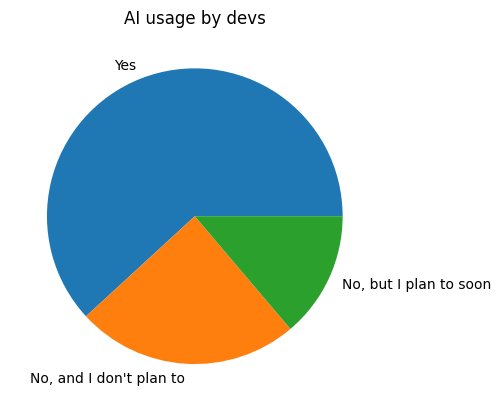

In [9]:
plt.pie(df['AISelect'].value_counts(),labels=df['AISelect'].unique()[:-1])
plt.title('AI usage by devs')

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['RemoteWork'] = le.fit_transform(df['RemoteWork'])
df['DevType']=le.fit_transform(df['DevType'])
df['AISelect']=le.fit_transform(df['AISelect'])

In [11]:
#custome encoding  'WorkExp'
df['Employment'] = np.where(df['Employment'].isin(['Employed, part-time', 'Employed, full-time',
'Independent contractor, freelancer, or self-employed;Student, part-time']), 1, 0)

In [12]:
def clean_year(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    else:
        return x
df['YearsCode'] = df['YearsCode'].apply(clean_year).fillna(-1).astype(int)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_year).fillna(-1).astype(int)

In [13]:
df_target1=df.drop(['BuildvsBuy'],axis=1)
df_target1.shape

(65437, 26)

In [14]:
onehot_encod=['TechEndorse','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','ToolsTechHaveWorkedWith']
for col in (onehot_encod):
    df_target1=pd.concat([df_target1,df[col].str.get_dummies(sep=';')], axis=1)

In [15]:
df_target1=df_target1.drop(onehot_encod,axis=1)
df_target1=pd.DataFrame(df_target1)
df_target1.shape

(65437, 210)

In [16]:
DevType = df_target1.columns[6]
column_data = df_target1.pop(DevType)
df_target1.insert(209, DevType, column_data)

In [17]:
y=df_target1.iloc[:,-1]
x=df_target1.iloc[:,:-1]
x.fillna(-1, inplace=True)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=1)

In [23]:
#LogisticRegression
#:(
y.nunique()
model=SVC(max_iter=100,random_state=42)
model.fit(x_train,y_train)
model.score(x_train,y_train)

c:\Users\User\Desktop\MLtasks\env\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.0916540908135781

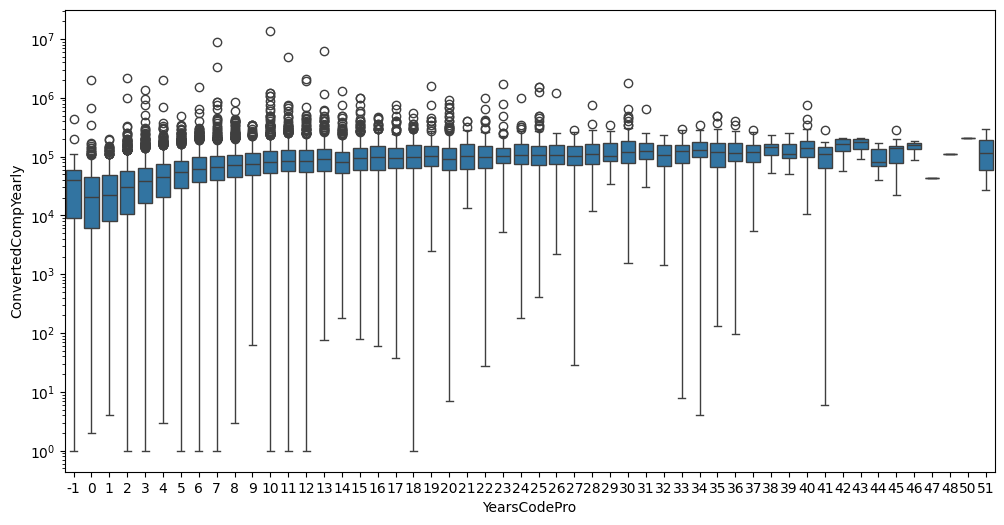

In [19]:
df2plot = df.dropna(subset=["ConvertedCompYearly", "YearsCodePro", "Age", "RemoteWork","JobSat"])
plt.figure(figsize=(12, 6))
sns.boxplot(x=df2plot["YearsCodePro"], y=df2plot["ConvertedCompYearly"])
plt.yscale("log") 

till 7 years experice of coding pro comp increases,but than stayed on a range

Text(0.5, 1.0, 'Impact of Coding Experience on Job Satisfaction')

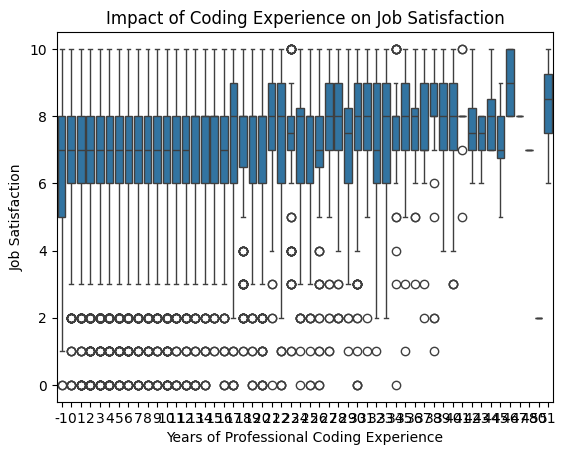

In [20]:
sns.boxplot(x=df2plot['YearsCodePro'], y=df2plot['JobSat'])
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction")
plt.title("Impact of Coding Experience on Job Satisfaction")

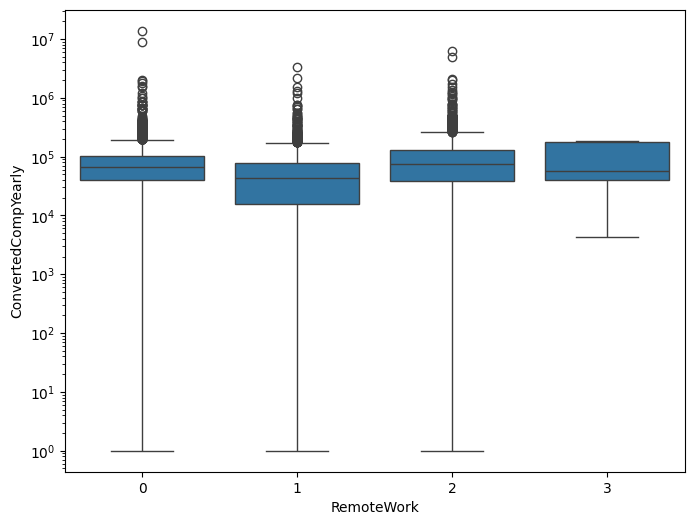

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2plot["RemoteWork"], y=df2plot["ConvertedCompYearly"])
plt.yscale("log")

Text(0.5, 1.0, 'most Popular Programming Languages')

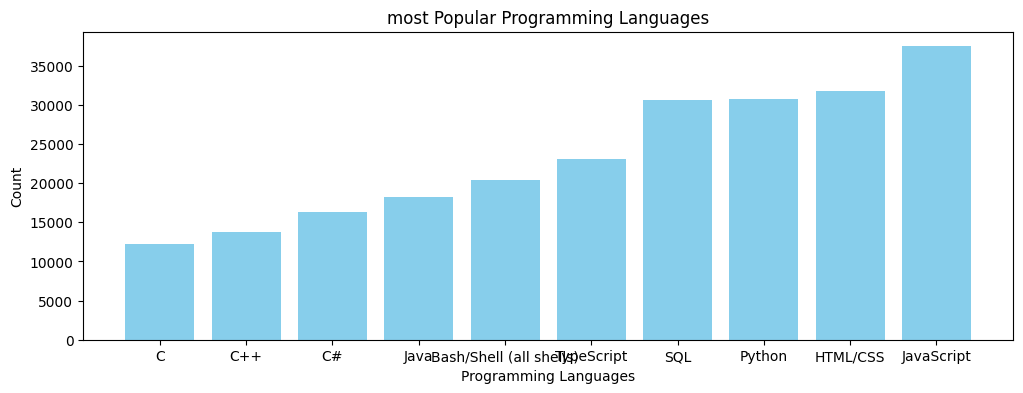

In [22]:
from collections import Counter
languages = df["LanguageHaveWorkedWith"].dropna().str.split(";").explode()
lang_counts = Counter(languages)
series = pd.Series(lang_counts)
sorted_series = series.sort_values()
top_10 = sorted_series.tail(10) 
most_lang = top_10 .to_dict()
languages = list(most_lang.keys())
counts = list(most_lang.values())

plt.figure(figsize=(12, 4))
plt.bar(languages, counts, color='skyblue')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.title('most Popular Programming Languages')